In [32]:
# Imports
from scipy.stats import spearmanr
from itertools import combinations
from datetime import datetime

import pandas as pd


def is_dependent(df, attr1, attr2, threshold=0.8):
    # Uses spearman test to check if two attributes in the 
    # specified dataframe are dependent.
    X, Y = df[attr1], df[attr2]
    corr, pvalue = spearmanr(X, Y)
    
    # Attributes are likely dependent if >= threshold
    return (abs(corr) >= threshold, corr)
    
    
if __name__ == '__main__':
    # Read from data source
    DATA_SOURCE = r'../data/credit_output.csv'
    df = pd.read_csv(DATA_SOURCE)

    # Read date as datetime object using MM/DD/YYYY format, convert to timestamp
    df['application_date'] = df['application_date'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp()
    )
    
    # Normalize
    df['application_date'] = (df['application_date'] - df['application_date'].min()) / (df['application_date'].max() - df['application_date'].min())

    # We change 'date' to 'date-timestamp' so that the date can be 
    # considered a continious number
    numeric_cols = [
        'checking_amt',
        'duration',
        'credit_amount',
        'savings',
        'installment_commitment', # Don't think this is categorical
        'residence_since',
        'age',
        'existing_credits',
        'num_dependents',
        'application_date'
    ] 

    # Iterate through combinations, determine dependence
    for c in combinations(numeric_cols, 2):
        X, Y = df[c[0]], df[c[1]]
        is_corr, corr = is_dependent(df, *c, threshold=0.33)
        if is_corr:
            print(f'{str(c[0]) + " & " + str(c[1]):<35}: {corr}')
            
    # duration & credit_amount           : 0.5503391332258094
        

duration & credit_amount           : 0.5503391332258094


array([[<AxesSubplot:xlabel='checking_amt', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='duration', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='credit_amount', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='savings', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='installment_commitment', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='residence_since', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='age', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='existing_credits', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='num_dependents', ylabel='checking_amt'>,
        <AxesSubplot:xlabel='application_date', ylabel='checking_amt'>],
       [<AxesSubplot:xlabel='checking_amt', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='credit_amount', ylabel='duration'>,
        <AxesSubplot:xlabel='savings', ylabel='duration'>,
        <AxesSubplot:xlabel='installment_commitment', ylabel='dur

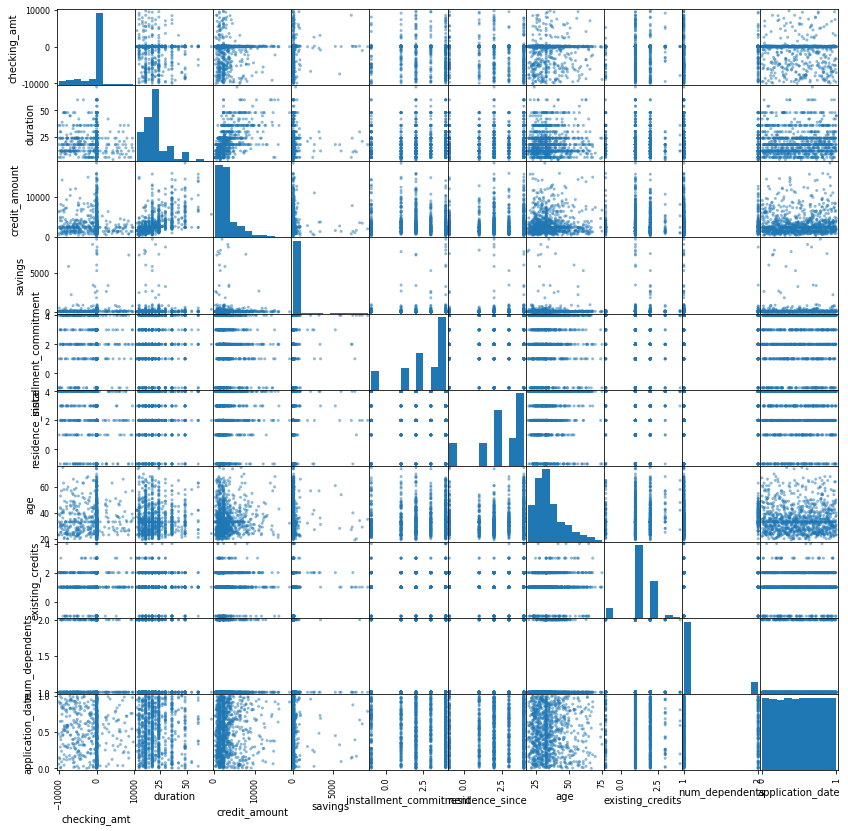

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    df,
    figsize=(14,14)
)